<a href="https://colab.research.google.com/github/prathamgarg911/Pytorch/blob/main/VGG_16_from_scratch_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import os
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import v2
from torch.utils.data import DataLoader, TensorDataset

In [2]:
!unzip /content/drive/MyDrive/computer-vision-pytorch/KOA_Dataset.zip

Archive:  /content/drive/MyDrive/computer-vision-pytorch/KOA_Dataset.zip
   creating: KOA_Dataset/0/
  inflating: KOA_Dataset/0/9001695L.png  
  inflating: KOA_Dataset/0/9001897L.png  
 extracting: KOA_Dataset/0/9003126L.png  
  inflating: KOA_Dataset/0/9003126R.png  
  inflating: KOA_Dataset/0/9003430L.png  
  inflating: KOA_Dataset/0/9003658L.png  
  inflating: KOA_Dataset/0/9003658R.png  
  inflating: KOA_Dataset/0/9004315L.png  
  inflating: KOA_Dataset/0/9004315R.png  
  inflating: KOA_Dataset/0/9004669L.png  
  inflating: KOA_Dataset/0/9004669R.png  
  inflating: KOA_Dataset/0/9005075L.png  
  inflating: KOA_Dataset/0/9005075R.png  
  inflating: KOA_Dataset/0/9005321L.png  
  inflating: KOA_Dataset/0/9005321R.png  
  inflating: KOA_Dataset/0/9005656L.png  
  inflating: KOA_Dataset/0/9005656R.png  
  inflating: KOA_Dataset/0/9007904L.png  
  inflating: KOA_Dataset/0/9007904R.png  
  inflating: KOA_Dataset/0/9008820L.png  
  inflating: KOA_Dataset/0/9008820R.png  
  inflating: KOA_

In [3]:
images_dict = {}
path = "/content/KOA_Dataset/"

In [4]:
for label in os.listdir(path):
  images_dict[int(label)] = os.listdir(path + label)

In [5]:
new_dict = {}

In [6]:
for keys in images_dict.keys():

  new_dict[keys] = [np.array(Image.open(path + str(keys) + "/" + images)) for images in images_dict[keys]]

In [7]:
len(new_dict[0])

400

In [8]:
new_dict.keys()

dict_keys([2, 4, 3, 1, 0])

In [9]:
training_image  = torch.tensor(torch.cat((torch.tensor(new_dict[0]),torch.tensor(new_dict[1]),torch.tensor(new_dict[2]),torch.tensor(new_dict[3]),torch.tensor(new_dict[4])),0))

<ipython-input-9-ef3442f4fda7>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  training_image  = torch.tensor(torch.cat((torch.tensor(new_dict[0]),torch.tensor(new_dict[1]),torch.tensor(new_dict[2]),torch.tensor(new_dict[3]),torch.tensor(new_dict[4])),0))
<ipython-input-9-ef3442f4fda7>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  training_image  = torch.tensor(torch.cat((torch.tensor(new_dict[0]),torch.tensor(new_dict[1]),torch.tensor(new_dict[2]),torch.tensor(new_dict[3]),torch.tensor(new_dict[4])),0))


In [11]:
training_image.shape

torch.Size([1895, 224, 224])

In [13]:
label0 = [0 for i in range(400)]
label1 = [1 for i in range(400)]
label2 = [2 for i in range(400)]
label3 = [3 for i in range(400)]
label4 = [4 for i in range(295)]

In [15]:
training_labels = torch.tensor(torch.cat((torch.tensor(label0),torch.tensor(label1),torch.tensor(label2),torch.tensor(label3),torch.tensor(label4)),0))

<ipython-input-15-a0c3c7c993e8>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  training_labels = torch.tensor(torch.cat((torch.tensor(label0),torch.tensor(label1),torch.tensor(label2),torch.tensor(label3),torch.tensor(label4)),0))


In [19]:
training_labels.shape

torch.Size([1895])

In [21]:
batch = 32


full_dataset = TensorDataset(training_image,training_labels)


train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])


train_loader = DataLoader(train_dataset,shuffle= True , batch_size = batch)
test_loader = DataLoader(test_dataset,shuffle = True, batch_size = batch )


In [ ]:
class VGG16(nn.Module):


  def __init__ (self):
    super(VGG16,self).__init__()

    self.conv1_0 = nn.Conv2d(1,64,3,padding=1)
    self.conv1_1 = nn.Conv2d(64,64,3,padding=1)
    self.conv1_2 = nn.Conv2d(64,128,3,padding=1)


    self.conv2_0 = nn.Conv2d(128,128,3,padding=1)
    self.conv2_1 = nn.Conv2d(128,256,3,padding=1)

    self.conv3_0 = nn.Conv2d(256,256,3,padding=1)
    self.conv3_1 = nn.Conv2d(256,256,3,padding=1)
    self.conv3_2 = nn.Conv2d(256,512,3,padding=1)

    self.conv4_0 = nn.conv2d(512,512,3,padding=1)
    self.conv4_1 = nn.conv2d(512,512,3,padding=1)
    self.conv4_2 = nn.conv2d(512,512,3,padding=1)

    self.fc_1    = nn.Linear(512*7*7,4096)
    self.fc_2    = nn.Linear(4096,1000)
    self.fc_3    = nn.Linear(1000,10)

    self.dropout = nn.Dropout(0.2)


    self.bnorm1 = nn.BatchNorm2d(64)
    self.bnorm2 = nn.BatchNorm2d(128)
    self.bnorm3 = nn.BatchNorm2d(256)
    self.bnorm4 = nn.BatchNorm2d(512)

    self.maxpool = nn.MaxPool2d(2)


  def forward(self,x) :

    x = F.relu(self.conv1_0(x))                  # 1 --> 64
    x = F.relu(self.bnorm1(self.conv1_1(x)))     # 64 --> 64
    x = F.relu(self.conv1_2(x))                  # 64 --> 128
    x = self.maxpool(x)                          # 224 --> 112

    x = F.relu(self.bnorm2(self.conv2_0(x)))     # 128 --> 128
    x = F.relu(self.conv2_1(x))                  # 128 --> 256
    x = self.maxpool(x)                          # 112 --> 56

    x = F.relu(self.conv3_0(x))                  # 256 --> 256
    x = F.relu(self.bnorm3(self.conv3_1(x)))     # 256 --> 256
    x = F.relu(self.conv3_2(x))                  # 256 --> 512
    x = self.maxpool(x)                          # 56 --> 28

    x = F.relu(self.conv4_0(x))                  # 512 --> 512
    x = F.relu(self.bnorm4(self.conv4_1(x)))     # 512 --> 512
    x = F.relu(self.conv4_2(x))                  # 512 --> 512
    x = self.maxpool(x)                          # 28 --> 14

    x = F.relu(self.fc_1(x))                     # 1 --> 64
    x = F.relu(self.fc_2(x))                     # 1 --> 64
    x = F.relu(self.fc_3(x))                     # 1 --> 64


    return x

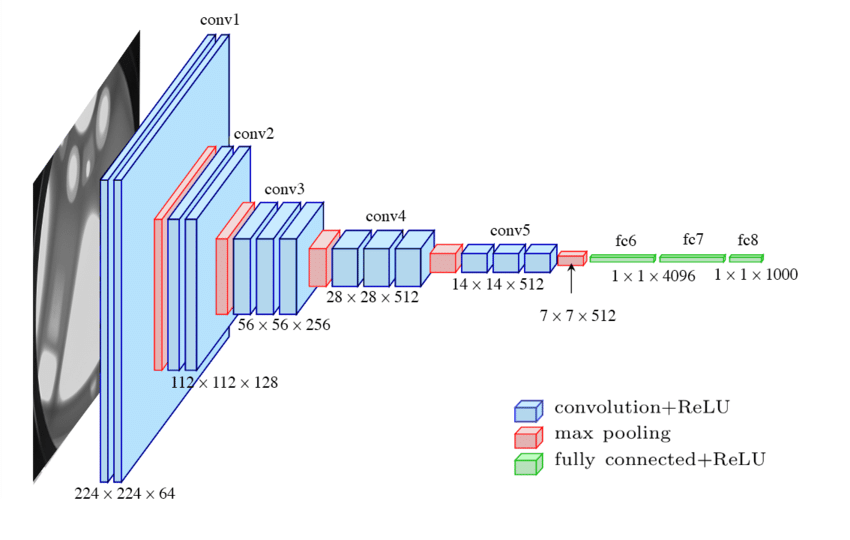

---

